# 1导入数据分析工具包

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings("ignore")
 
%matplotlib inline

In [2]:
import numpy as np
print(np.__version__)


1.21.6


# 2数据读取

In [3]:
train_data_file = "./data/zhengqi_train.txt"
test_data_file =  "./data/zhengqi_test.txt"

train_data = pd.read_csv(train_data_file, sep='\t', encoding='utf-8')
test_data = pd.read_csv(test_data_file, sep='\t', encoding='utf-8')

# 3训练数据总览

In [4]:
train_data.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,...,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000
mean,0.123048,0.056068,0.289720,-0.067790,0.012921,-0.558565,0.182892,0.116155,0.177856,-0.169452,...,0.097648,0.055477,0.127791,0.020806,0.007801,0.006715,0.197764,0.030658,-0.130330,0.126353
std,0.928031,0.941515,0.911236,0.970298,0.888377,0.517957,0.918054,0.955116,0.895444,0.953813,...,1.061200,0.901934,0.873028,0.902584,1.006995,1.003291,0.985675,0.970812,1.017196,0.983966
min,-4.335000,-5.122000,-3.420000,-3.956000,-4.742000,-2.182000,-4.576000,-5.048000,-4.692000,-12.891000,...,-2.912000,-4.507000,-5.859000,-4.053000,-4.627000,-4.789000,-5.695000,-2.608000,-3.630000,-3.044000
25%,-0.297000,-0.226250,-0.313000,-0.652250,-0.385000,-0.853000,-0.310000,-0.295000,-0.159000,-0.390000,...,-0.664000,-0.283000,-0.170250,-0.407250,-0.499000,-0.290000,-0.202500,-0.413000,-0.798250,-0.350250
50%,0.359000,0.272500,0.386000,-0.044500,0.110000,-0.466000,0.388000,0.344000,0.362000,0.042000,...,-0.023000,0.053500,0.299500,0.039000,-0.040000,0.160000,0.364000,0.137000,-0.185500,0.313000
75%,0.726000,0.599000,0.918250,0.624000,0.550250,-0.154000,0.831250,0.782250,0.726000,0.042000,...,0.745250,0.488000,0.635000,0.557000,0.462000,0.273000,0.602000,0.644250,0.495250,0.793250
max,2.121000,1.918000,2.828000,2.457000,2.689000,0.489000,1.895000,1.918000,2.245000,1.335000,...,4.580000,2.689000,2.013000,2.395000,5.465000,5.110000,2.324000,5.238000,3.000000,2.538000


# 4特征工程

## 4.1异常值分析（箱型图）

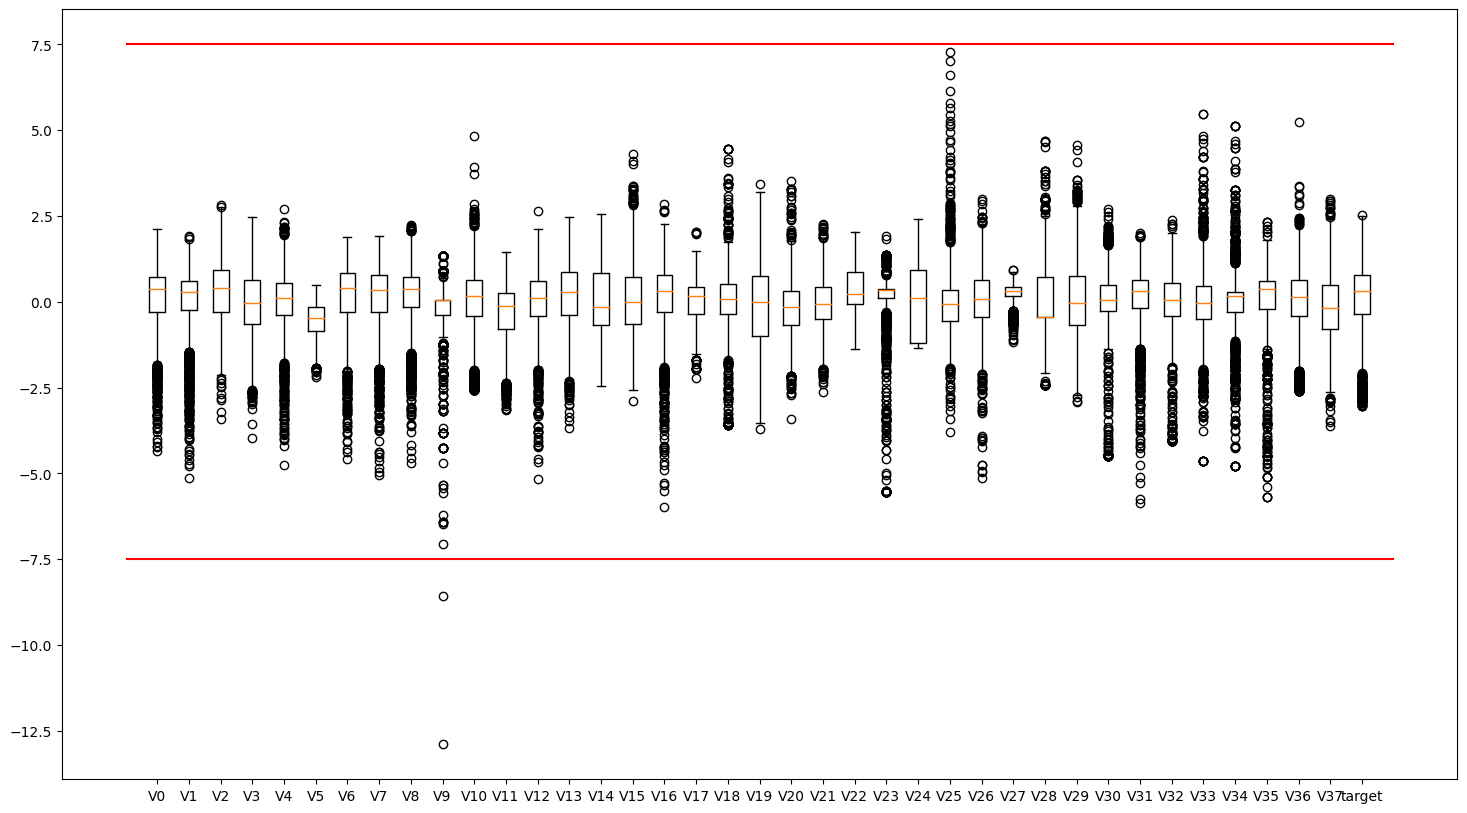

In [5]:
plt.figure(figsize=(18, 10))
plt.boxplot(x=train_data.values,labels=train_data.columns)
plt.hlines([-7.5, 7.5], 0, 40, colors='r') # 0,40：水平线起始结束位置
plt.show()

从箱线图可以看出，有些特征存在明显的异常值、如V9变量。接下来分别把训练集和测试集中的异常值删除。

#### 代码详解：
1. `plt.boxplot(x=train_data.values,labels=train_data.columns)`：使用`boxplot`函数绘制箱线图。其中，`train_data.values`是要绘制箱线图的数据，`labels=train_data.columns`表示箱线图中每个箱子对应的标签是`train_data`数据集的列名。


2. `plt.hlines([-7.5, 7.5], 0, 40, colors='r')`：使用`hlines`函数绘制水平线。`[-7.5, 7.5]`表示要绘制的水平线的位置，0和40分别表示水平线的起始和结束位置，`colors='r'`表示线条颜色为红色。

该段代码使用matplotlib库绘制了一个箱线图，展示了`train_data`数据集中各个特征列的分布情况，并在图中添加了两条水平线（-7.5和7.5），用于标记异常值的阈值。

### 4.1.1删除异常值

In [6]:
train_data = train_data[train_data['V9']>-7.5] # 保留大于-7.5的值
test_data = test_data[test_data['V9']>-7.5]

display(train_data.describe())
display(test_data.describe())

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.00000,...,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000
mean,0.123725,0.056856,0.290340,-0.068364,0.012254,-0.558971,0.183273,0.116274,0.178138,-0.16213,...,0.097019,0.058619,0.127617,0.023626,0.008271,0.006959,0.198513,0.030099,-0.131957,0.127451
std,0.927984,0.941269,0.911231,0.970357,0.888037,0.517871,0.918211,0.955418,0.895552,0.91089,...,1.060824,0.894311,0.873300,0.896509,1.007175,1.003411,0.985058,0.970258,1.015666,0.983144
min,-4.335000,-5.122000,-3.420000,-3.956000,-4.742000,-2.182000,-4.576000,-5.048000,-4.692000,-7.07100,...,-2.912000,-4.507000,-5.859000,-4.053000,-4.627000,-4.789000,-5.695000,-2.608000,-3.630000,-3.044000
25%,-0.292000,-0.224250,-0.310000,-0.652750,-0.385000,-0.853000,-0.310000,-0.295000,-0.158750,-0.39000,...,-0.664000,-0.282000,-0.170750,-0.405000,-0.499000,-0.290000,-0.199750,-0.412750,-0.798750,-0.347500
50%,0.359500,0.273000,0.386000,-0.045000,0.109500,-0.466000,0.388500,0.345000,0.362000,0.04200,...,-0.023000,0.054500,0.299500,0.040000,-0.040000,0.160000,0.364000,0.137000,-0.186000,0.314000
75%,0.726000,0.599000,0.918750,0.623500,0.550000,-0.154000,0.831750,0.782750,0.726000,0.04200,...,0.745000,0.488000,0.635000,0.557000,0.462000,0.273000,0.602000,0.643750,0.493000,0.793750
max,2.121000,1.918000,2.828000,2.457000,2.689000,0.489000,1.895000,1.918000,2.245000,1.33500,...,4.580000,2.689000,2.013000,2.395000,5.465000,5.110000,2.324000,5.238000,3.000000,2.538000


,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
count,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,...,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000
mean,-0.184404,-0.083912,-0.434762,0.101671,-0.019172,0.838049,-0.274092,-0.173971,-0.266709,0.255114,...,-0.206871,-0.146463,-0.083215,-0.191729,-0.030782,-0.011433,-0.009985,-0.296895,-0.046270,0.195735
std,1.073333,1.076670,0.969541,1.034925,1.147286,0.963043,1.054119,1.040101,1.085916,1.014394,...,1.064140,0.880593,1.126414,1.138454,1.130228,0.989732,0.995213,0.946896,1.040854,0.940599
min,-4.814000,-5.488000,-4.283000,-3.276000,-4.921000,-1.168000,-5.649000,-5.625000,-6.059000,-6.784000,...,-2.435000,-2.413000,-4.507000,-7.698000,-4.057000,-4.627000,-4.789000,-7.477000,-2.608000,-3.346000
25%,-0.664000,-0.451000,-0.978000,-0.644000,-0.497000,0.122000,-0.732000,-0.509000,-0.775000,-0.390000,...,-0.453000,-0.818000,-0.339000,-0.476000,-0.472000,-0.460000,-0.290000,-0.349000,-0.593000,-0.432000
50%,0.065000,0.195000,-0.267000,0.220000,0.118000,0.437000,-0.082000,0.018000,-0.004000,0.401000,...,-0.445000,-0.199000,0.010000,0.100000,0.155000,-0.040000,0.160000,-0.270000,0.083000,0.152000
75%,0.549000,0.589000,0.278000,0.793000,0.610000,1.928000,0.457000,0.515000,0.482000,0.904000,...,-0.434000,0.468000,0.447000,0.471000,0.627000,0.419000,0.273000,0.364000,0.651000,0.797000
max,2.100000,2.120000,1.946000,2.603000,4.475000,3.176000,1.528000,1.394000,2.408000,1.766000,...,4.656000,3.022000,3.139000,1.428000,2.299000,5.465000,5.110000,1.671000,2.861000,3.021000


## 4.2特征缩放（最大最小值归一化）

In [7]:
from sklearn import preprocessing 

features_columns = [col for col in train_data.columns if col not in ['target']]

min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler = min_max_scaler.fit(train_data[features_columns])

train_data_scaler = min_max_scaler.transform(train_data[features_columns])
test_data_scaler = min_max_scaler.transform(test_data[features_columns])

train_data_scaler = pd.DataFrame(train_data_scaler)
train_data_scaler.columns = features_columns

test_data_scaler = pd.DataFrame(test_data_scaler)
test_data_scaler.columns = features_columns

train_data_scaler['target'] = train_data['target']

In [8]:
display(train_data_scaler.describe())
display(test_data_scaler.describe())

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,...,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2884.000000
mean,0.690633,0.735633,0.593844,0.606212,0.639787,0.607649,0.735477,0.741354,0.702053,0.821897,...,0.401631,0.634466,0.760495,0.632231,0.459302,0.484489,0.734944,0.336235,0.527608,0.127274
std,0.143740,0.133703,0.145844,0.151311,0.119504,0.193887,0.141896,0.137154,0.129098,0.108362,...,0.141594,0.124279,0.110938,0.139037,0.099799,0.101365,0.122840,0.123663,0.153192,0.983462
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.044000
25%,0.626239,0.695703,0.497759,0.515087,0.586328,0.497566,0.659249,0.682314,0.653489,0.794789,...,0.300053,0.587132,0.722593,0.565757,0.409037,0.454490,0.685279,0.279792,0.427036,-0.348500
50%,0.727153,0.766335,0.609155,0.609855,0.652873,0.642456,0.767192,0.774189,0.728557,0.846181,...,0.385611,0.633894,0.782330,0.634770,0.454518,0.499949,0.755580,0.349860,0.519457,0.313000
75%,0.783922,0.812642,0.694422,0.714096,0.712152,0.759266,0.835690,0.837030,0.781029,0.846181,...,0.488121,0.694136,0.824949,0.714950,0.504261,0.511365,0.785260,0.414447,0.621870,0.794250
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.538000


,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
count,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,...,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000
mean,0.642905,0.715637,0.477791,0.632726,0.635558,1.130681,0.664798,0.699688,0.637926,0.871534,...,0.313556,0.369132,0.614756,0.719928,0.623793,0.457349,0.482778,0.673164,0.326501,0.577034
std,0.166253,0.152936,0.155176,0.161379,0.154392,0.360555,0.162899,0.149311,0.156540,0.120675,...,0.149752,0.117538,0.156533,0.144621,0.175284,0.098071,0.100537,0.118082,0.132661,0.141870
min,-0.074195,-0.051989,-0.138124,0.106035,-0.024088,0.379633,-0.165817,-0.082831,-0.197059,0.034142,...,0.000000,0.066604,0.000000,-0.233613,-0.000620,0.000000,0.000000,-0.222222,0.000000,0.042836
25%,0.568618,0.663494,0.390845,0.516451,0.571256,0.862598,0.594035,0.651593,0.564653,0.794789,...,0.278919,0.279498,0.579211,0.683816,0.555366,0.412901,0.454490,0.666667,0.256819,0.482353
50%,0.681537,0.755256,0.504641,0.651177,0.654017,0.980532,0.694483,0.727247,0.675796,0.888889,...,0.280045,0.362120,0.627710,0.756987,0.652605,0.454518,0.499949,0.676518,0.342977,0.570437
75%,0.756506,0.811222,0.591869,0.740527,0.720226,1.538750,0.777778,0.798593,0.745856,0.948727,...,0.281593,0.451148,0.688438,0.804116,0.725806,0.500000,0.511365,0.755580,0.415371,0.667722
max,0.996747,1.028693,0.858835,1.022766,1.240345,2.005990,0.943285,0.924777,1.023497,1.051273,...,0.997889,0.792045,1.062535,0.925686,0.985112,1.000000,1.000000,0.918568,0.697043,1.003167


#### 代码详解：

1. `features_columns = [col for col in train_data.columns if col not in ['target']]`：使用列表推导式创建一个列表`features_columns`，其中包含除了'target'列之外的所有训练数据的特征列。

3. `min_max_scaler = preprocessing.MinMaxScaler()`：创建一个MinMaxScaler对象，用于进行特征缩放。

4. `min_max_scaler = min_max_scaler.fit(train_data[features_columns])`：使用训练数据的特征列拟合（fit）MinMaxScaler对象，计算训练集中每个特征的最小值和最大值。

5. `train_data_scaler = min_max_scaler.transform(train_data[features_columns])`：将训练数据的特征列使用MinMaxScaler进行缩放转换，得到缩放后的训练数据。

6. `test_data_scaler = min_max_scaler.transform(test_data[features_columns])`：将测试数据的特征列使用相同的MinMaxScaler进行缩放转换，得到缩放后的测试数据。这里使用的是在训练数据上拟合的MinMaxScaler对象，保证了训练数据和测试数据的缩放方式一致。

7. `train_data_scaler = pd.DataFrame(train_data_scaler)`：将缩放后的训练数据转换为DataFrame格式。

8. `train_data_scaler.columns = features_columns`：将缩放后的训练数据的列名设置为原始特征列的列名，保持一致性。

9. `test_data_scaler = pd.DataFrame(test_data_scaler)`：将缩放后的测试数据转换为DataFrame格式。

10. `test_data_scaler.columns = features_columns`：将缩放后的测试数据的列名设置为原始特征列的列名，保持一致性。

11. `train_data_scaler['target'] = train_data['target']`：将缩放后的训练数据中的'target'列设置为原始训练数据的'target'列，这样保留了目标变量。

-----
**fit与transform：**

1. fit方法：
   - fit方法用于从训练数据中学习模型的参数或数据转换所需的统计信息。
   - 在fit方法中，模型会根据训练数据自动计算并确定转换所需的参数，例如均值、标准差等。
   - fit方法通常只针对训练数据集进行调用，以便使模型能够根据训练数据适应最佳的参数设置。

2. transform方法：
   - transform方法用于将原始数据转换为经过预处理后的数据。
   - 在transform方法中，模型会根据之前学习到的参数或统计信息，对数据进行相应的转换操作。
   - transform方法通常在训练数据和测试数据上分别调用，以便将它们都转换为相同的预处理格式，保证数据的一致性。

fit和transform方法在不同的预处理类中具有相对应的方法名：

- MinMaxScaler类，fit方法用于计算每个特征的最小值和最大值，transform方法用于将数据缩放到给定的范围，默认为[0, 1]。

- StandardScaler类，fit方法用于计算每个特征的均值和标准差，transform方法用于将数据进行标准化处理，使其均值为0，标准差为1。

- OneHotEncoder类，fit方法用于确定类别特征的所有可能取值，并构建映射关系，transform方法用于将类别特征转换为二进制矩阵表示。

fit方法用于从 ==训练数据== 中 ==学习== 模型的 ==参数== 或统计信息，transform方法用于将原始数据按照之前学习到的参数或统计信息进行转换。在实际应用中，通常先调用fit方法对模型进行训练，然后再调用transform方法对训练数据和测试数据进行相同的数据预处理操作。

使用MinMaxScaler对数据进行缩放时，通常将其fit在训练集上的原因是为了避免信息泄漏（information leakage）。

信息泄漏是指在数据预处理过程中，使用了不应该在当前步骤中可用的额外信息。这可能导致模型在实际应用中性能下降，因为会在测试集上产生过于乐观的估计。

将MinMaxScaler仅拟合（fit）于训练数据的优势有两个：
- 模型只能使用训练集的信息进行训练和预测，这符合机器学习的基本原则。模型无法直接访问测试集的任何信息，以确保其在真实世界中的性能。
- 防止信息泄漏。如果将MinMaxScaler同时拟合于训练集和测试集，就相当于使用了测试集的信息来进行预处理，将测试集的信息引入到了训练过程中。这可能会导致过于乐观的结果。
- 测试集是用于评估模型性能的独立数据集。如果对测试集拟合（fit），则使用不同的预处理参数，那么测试集的数据范围和分布就会与训练集不一致，这可能导致模型在实际应用中表现不佳。


------
**`column = train_data.columns.tolist()[:39]`与
`columns = [col for col in train_data.columns]`
这两种获取列名的区别和优劣：** 

1. `column = train_data.columns.tolist()[:39]`：
   - 这种方式将DataFrame的列名转换为一个Python列表。
   - 优点：简单直接，获取指定数量的列名。
   - 缺点：只能获取指定数量的列名，不适用于需要选择特定列或基于某些条件筛选列名的情况。

2. `columns = [col for col in train_data.columns]`：
   - 这种方式使用列表推导式将DataFrame的所有列名存储到一个列表中。
   - 优点：可以获取DataFrame中的所有列名，提供了更大的灵活性。可以通过条件筛选、修改等方式来操作列名。
   - 缺点：相对于第一种方式来说，代码稍微复杂一些。

所以，选择哪种方式取决于具体的需求：
- 如果只需要获取特定数量的列名，且数量固定，可以使用`train_data.columns.tolist()[:39]`方式，简单且明确。
- 如果需要对列名进行更多的操作，如条件筛选、修改等，或者需要获取所有列名，例如`col for col in train_data.columns if col not in ['target']` 那么使用列表推导式会更灵活。



## 4.3查看数据分布情况

我们利用KDE分布对比特征变量在训练集和测试集中的分布情况。对比后发现：特征变量V5, V9, V11, V17, V22, V28在训练集和测试集中的分布差异较大，会影响模型的泛化能力，故删除这些特征

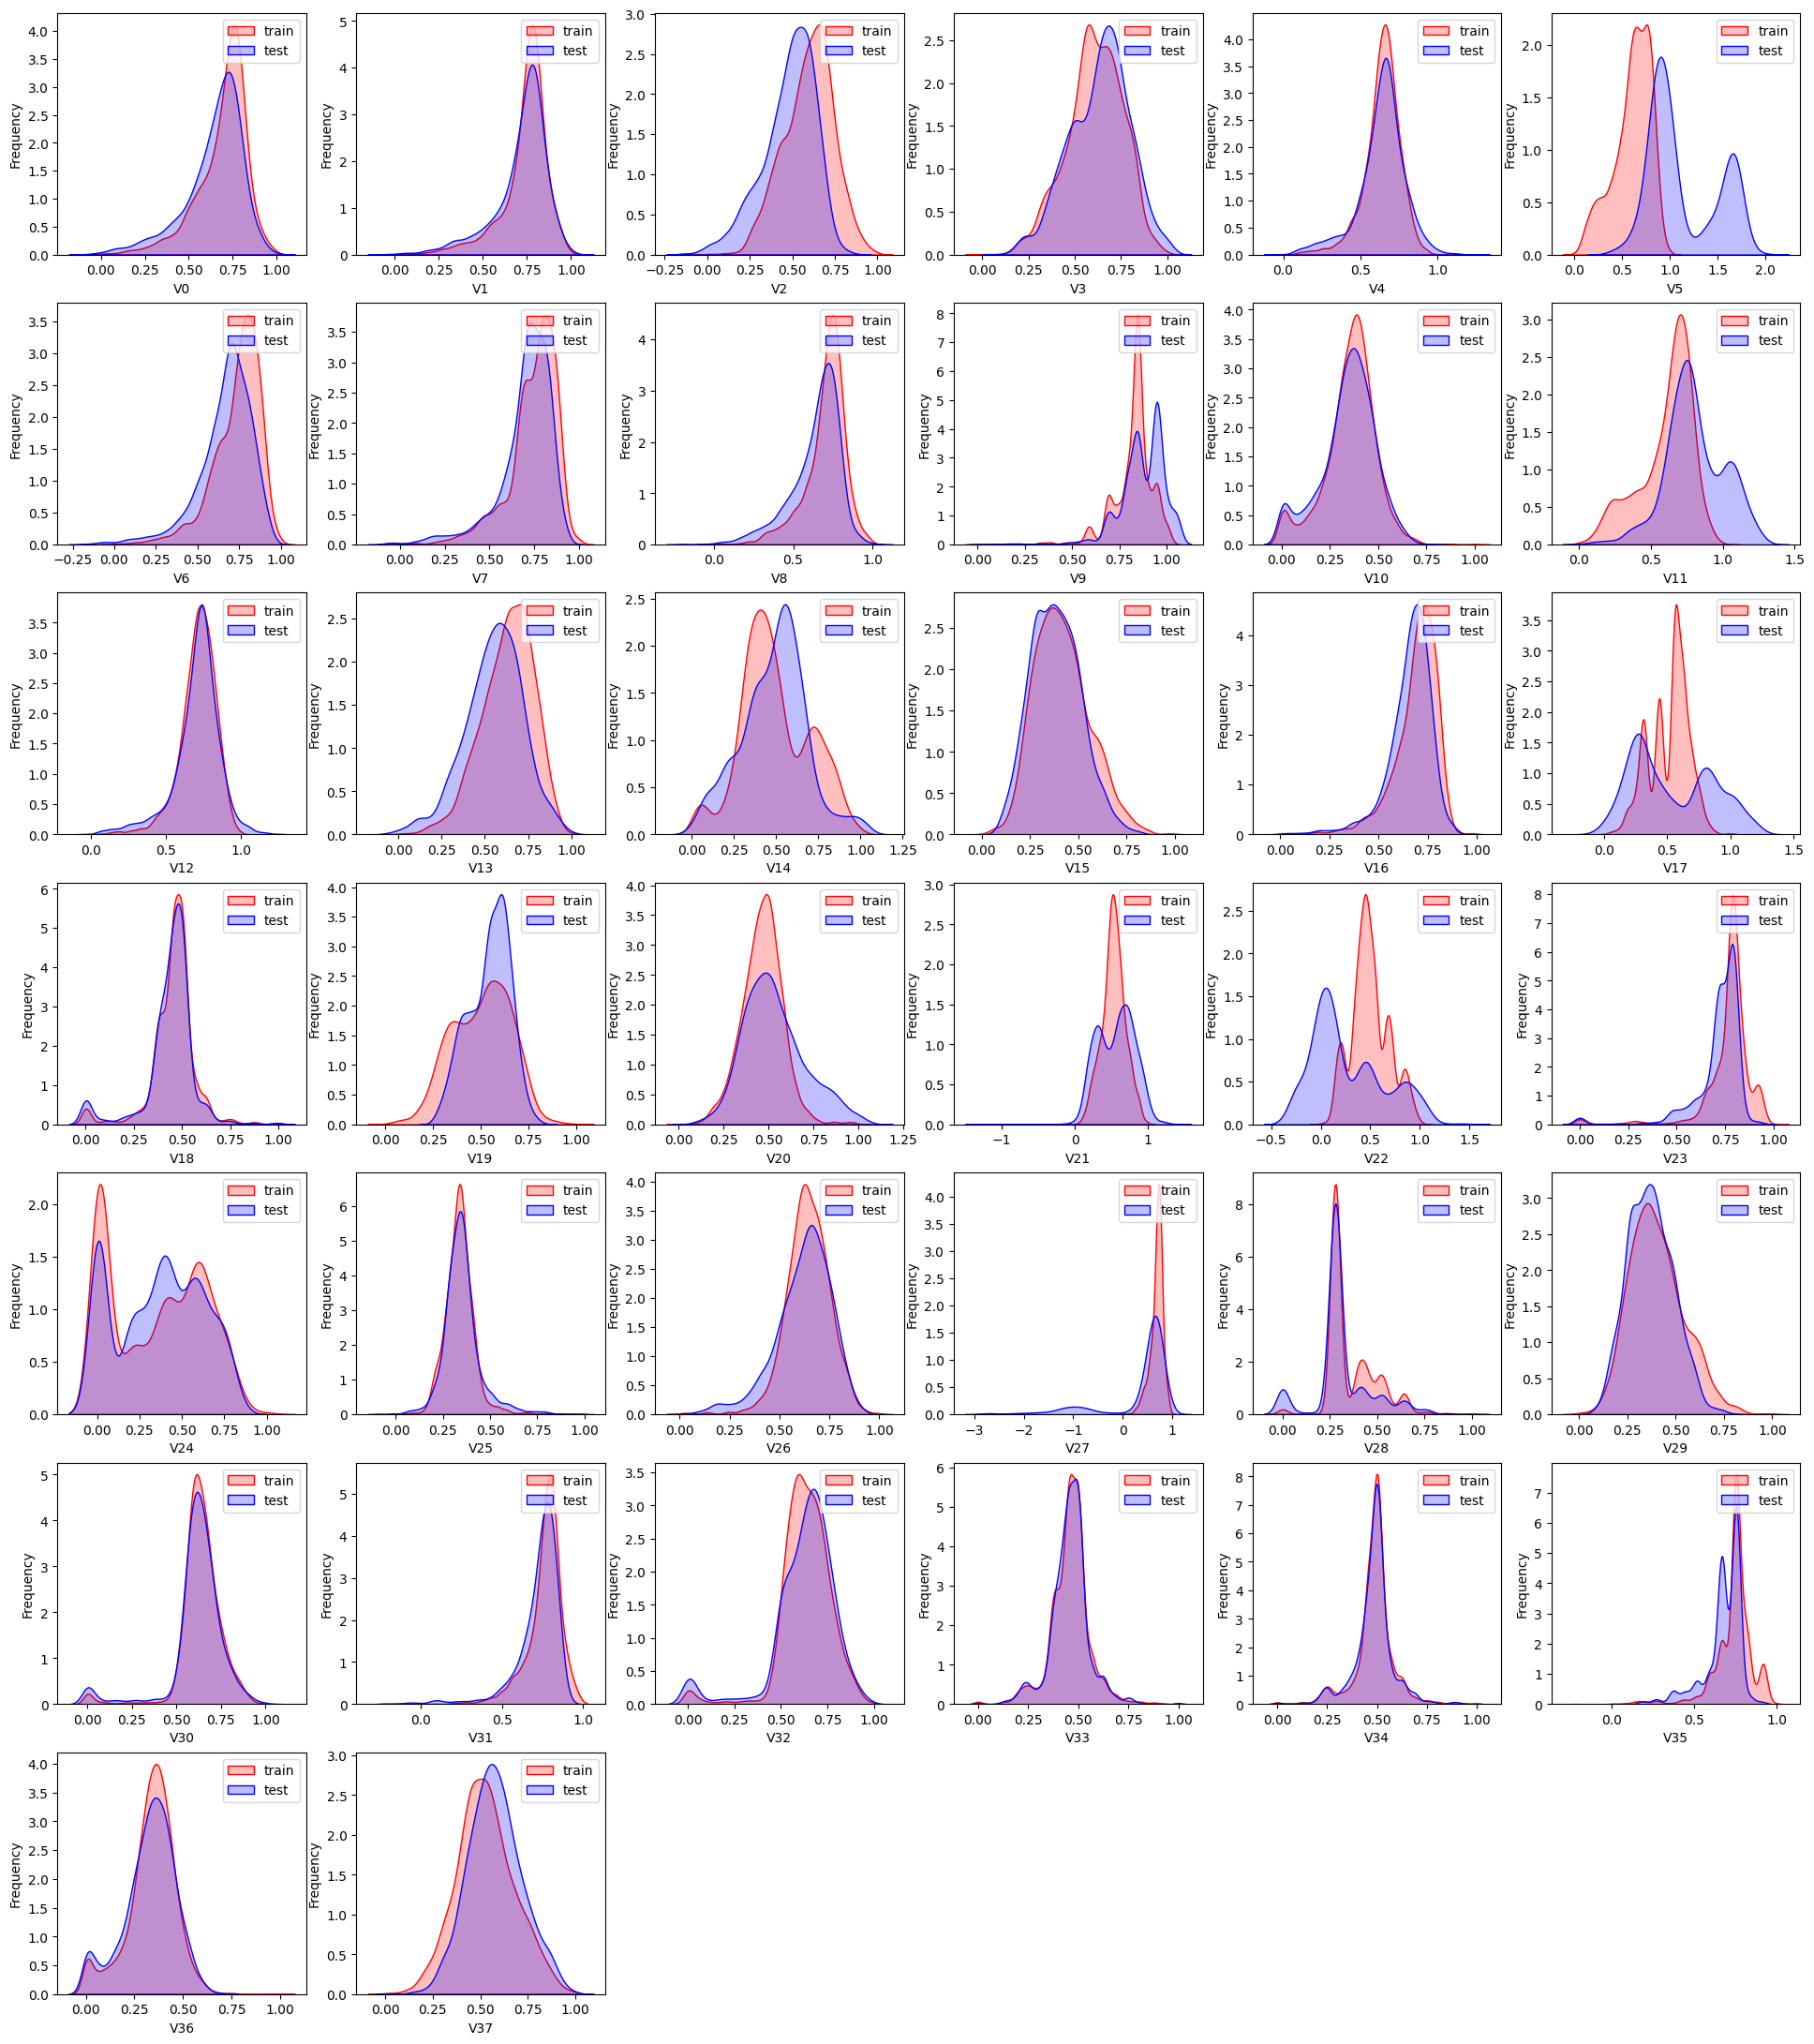

In [9]:
# KDE分布
dist_cols = 6
dist_rows = len(test_data_scaler.columns)

plt.figure(figsize=(4*dist_cols,4*dist_rows))


for i, col in enumerate(test_data_scaler.columns):
    ax=plt.subplot(dist_rows,dist_cols,i+1)
    ax = sns.kdeplot(train_data_scaler[col], color="Red", shade=True)
    ax = sns.kdeplot(test_data_scaler[col], color="Blue", shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax = ax.legend(["train","test"])
 
plt.show()

#### 代码解释：
`for i, col in enumerate(test_data_scaler.columns)`：迭代循环，遍历`test_data_scaler.columns`中的每一列，并使用`enumerate`函数同时将列的索引赋值给`i`，列名赋值给`col`。


查看特征'V5', 'V17', 'V28', 'V22', 'V11', 'V9'数据的数据分布

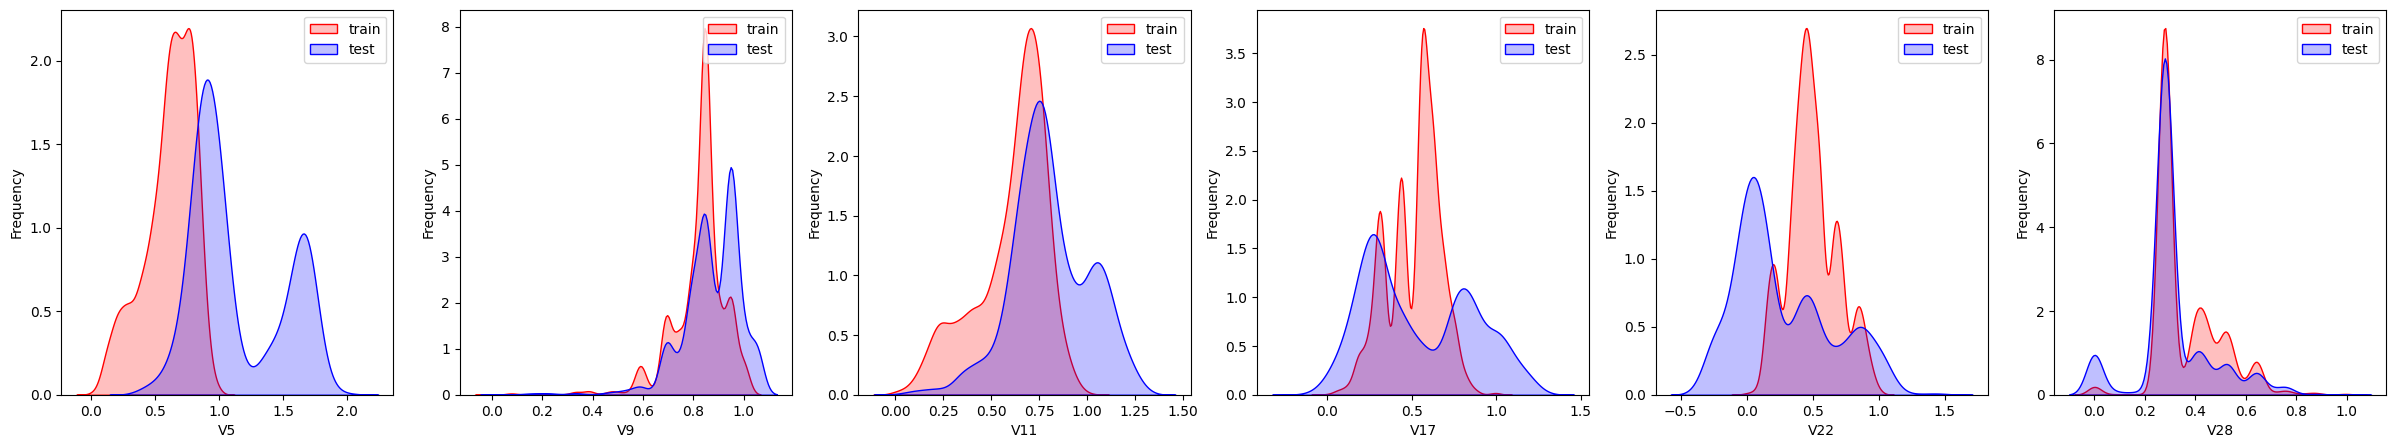

In [10]:
drop_col = 6
drop_row = 1

plt.figure(figsize=(5*drop_col,5*drop_row))

for i, col in enumerate(["V5","V9","V11","V17","V22","V28"]):
    ax =plt.subplot(drop_row,drop_col,i+1)
    ax = sns.kdeplot(train_data_scaler[col], color="Red", shade=True)
    ax= sns.kdeplot(test_data_scaler[col], color="Blue", shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax = ax.legend(["train","test"])
plt.show()

这几个特征下，训练集的数据和测试集的数据分布不一致，会影响模型的泛化能力，故删除这些特征

In [11]:
data_train_scaler = train_data_scaler.drop(['V5','V9','V11','V17','V22','V28'],axis=1)
data_train_scaler.head()

,V0,V1,V2,V3,V4,V6,V7,V8,V10,V12,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
0,0.759139,0.729830,0.524488,0.680337,0.698964,0.427136,0.385874,0.613522,0.221743,0.698875,...,0.406834,0.641467,0.666159,0.679280,0.00000,0.000000,0.074074,0.000000,0.018401,0.175
1,0.821406,0.789631,0.557939,0.705130,0.664244,0.465152,0.385874,0.724232,0.373887,0.690502,...,0.371596,0.643552,0.748349,0.721619,0.37495,0.499949,0.755580,0.289702,0.437406,0.676
2,0.828377,0.808239,0.584987,0.674567,0.653210,0.495905,0.385874,0.733458,0.466415,0.699012,...,0.387480,0.676487,0.779472,0.610577,0.37495,0.499949,0.755580,0.429901,0.458673,0.633
3,0.785006,0.779830,0.592670,0.642601,0.718746,0.521712,0.425208,0.734467,0.350013,0.706972,...,0.390683,0.684269,0.779726,0.722084,0.37495,0.477220,0.755580,0.374841,0.530618,0.206
4,0.777416,0.818182,0.588988,0.649462,0.683488,0.541338,0.425208,0.721638,0.314675,0.736206,...,0.413107,0.776126,0.785950,0.693393,0.37495,0.462067,0.755580,0.296712,0.543288,0.384


## 4.4特征相关性

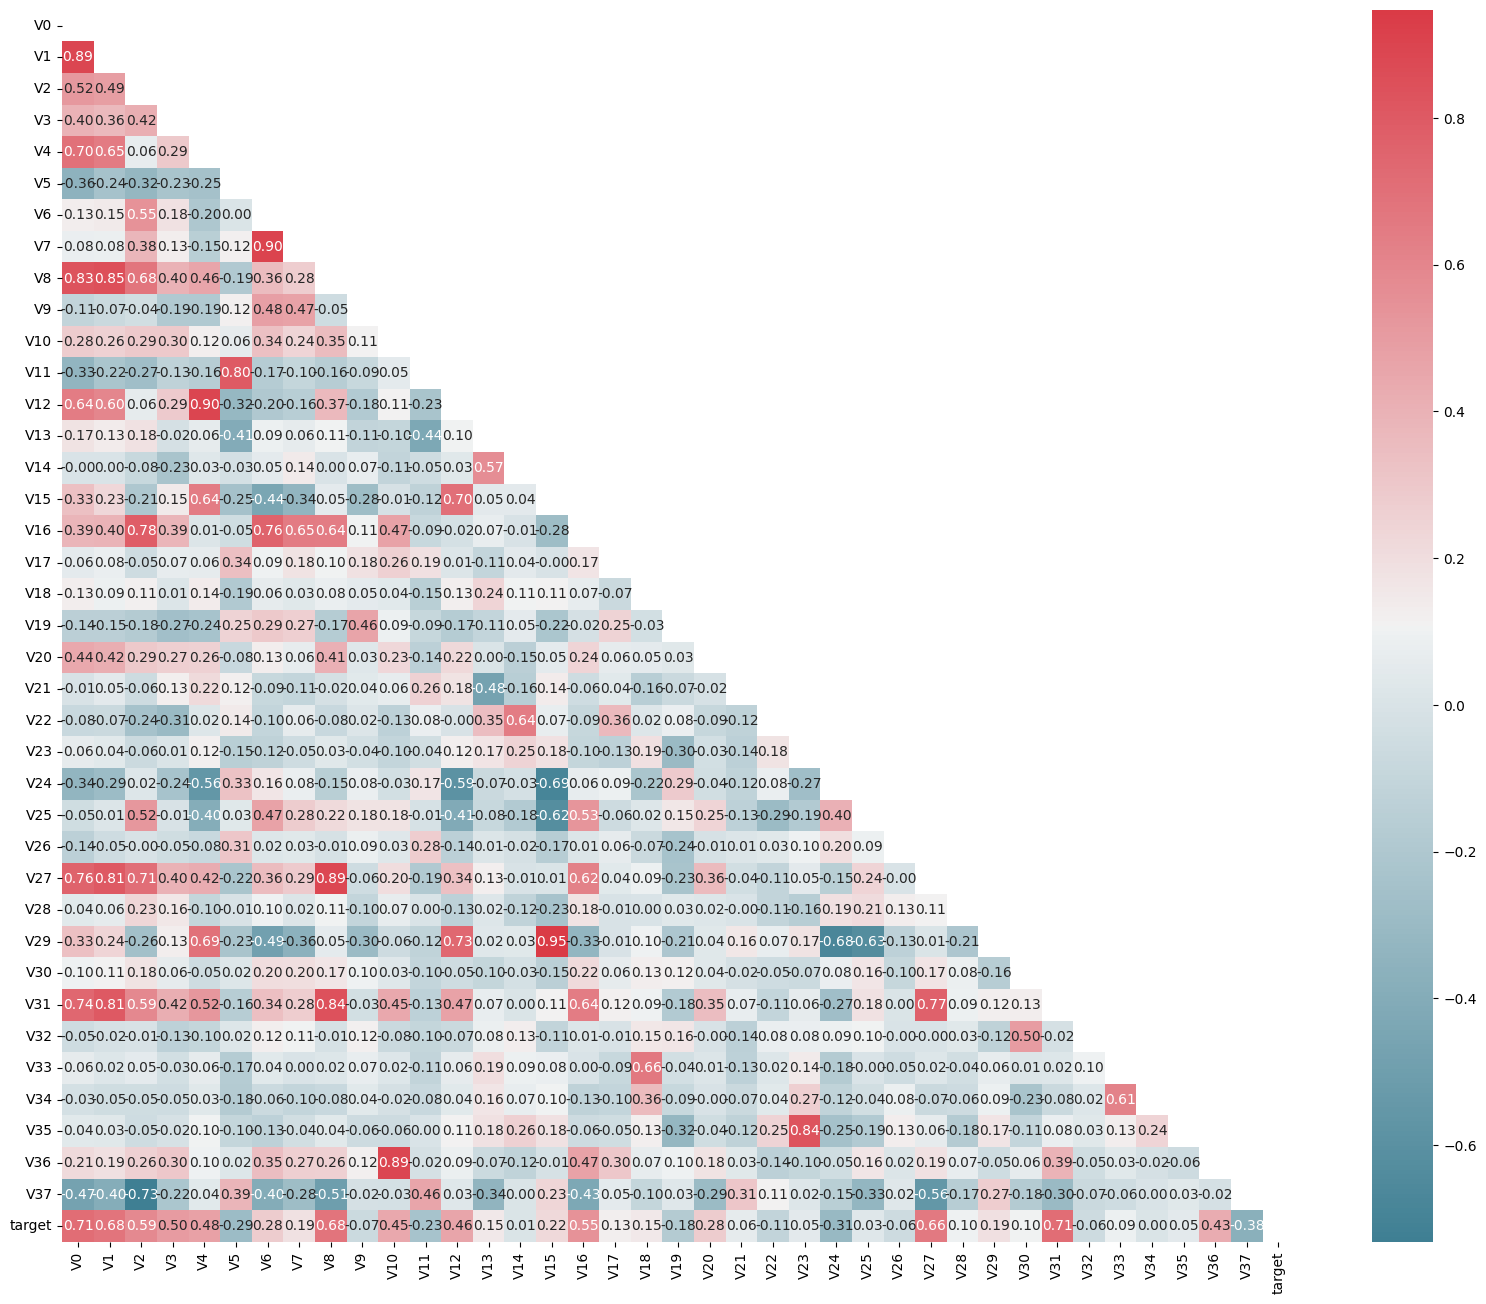

In [12]:
plt.figure(figsize=(20, 16))  
column = train_data_scaler.columns.tolist()  
mcorr = train_data_scaler[column].corr(method="spearman")  
mask = np.zeros_like(mcorr, dtype=np.bool)  
mask[np.triu_indices_from(mask)] = True  
cmap = sns.diverging_palette(220, 10, as_cmap=True)  
g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')  
plt.show()

## 4.5特征降维

### 4.5.1相关性初筛1
进行特征相关性初筛，计算相关性系数并筛选大于0.1的特征变量

In [13]:
mcorr=mcorr.abs()
numerical_corr=mcorr[mcorr['target']>0.1]['target']
print(numerical_corr.sort_values(ascending=False))

# 还可以使用spearman相关性系数进行排序显示，如下：
index0 = numerical_corr.sort_values(ascending=False).index
print(train_data_scaler[index0].corr('spearman'))

target    1.000000
V0        0.712403
V31       0.711636
V1        0.682909
V8        0.679469
V27       0.657398
V2        0.585850
V16       0.545793
V3        0.501622
V4        0.478683
V12       0.460300
V10       0.448682
V36       0.425991
V37       0.376443
V24       0.305526
V5        0.286076
V6        0.280195
V20       0.278381
V11       0.234551
V15       0.221290
V29       0.190109
V7        0.185321
V19       0.180111
V18       0.149741
V13       0.149199
V17       0.126262
V22       0.112743
V30       0.101378
Name: target, dtype: float64
          target        V0       V31        V1        V8       V27        V2  \
target  1.000000  0.712403  0.711636  0.682909  0.679469  0.657398  0.585850   
V0      0.712403  1.000000  0.739116  0.894116  0.832151  0.763128  0.516817   
V31     0.711636  0.739116  1.000000  0.807585  0.841469  0.765750  0.589890   
V1      0.682909  0.894116  0.807585  1.000000  0.849034  0.807102  0.490239   
V8      0.679469  0.832151  0.841469  0

#### 代码详解：

1. 使用 `mcorr.abs()`对相关性矩阵 `mcorr` 中的各个元素取绝对值。


2. `mcorr[mcorr['target']>0.1]` 从 `mcorr` 中筛选出目标变量（`target`）相关性大于 0.1 的特征行，接着 `mcorr[mcorr['target']>0.1]['target']`提取出 `target` 列。


3. 对 `numerical_corr` 进行降序排序，`.sort_values(ascending=False)` 表示按照降序排列，即相关性系数较高的特征显示在前面。


4. `numerical_corr.sort_values(ascending=False).index` 对 `numerical_corr` 进行降序排序，并提取排序后的索引，并将其赋值给 `index0`。


5. 通过 `train_data_scaler[index0]` 获取 `train_data_scaler` 中与 `index0` 中特征名称索引对应的特征列，并使用 `.corr('spearman')` 计算这些特征之间的斯皮尔曼相关系数。


### 4.5.2相关性初筛2

In [14]:
features_corr = numerical_corr.sort_values(ascending=False).reset_index()
features_corr.columns = ['features_and_target', 'corr']
features_corr_select = features_corr[features_corr['corr']>0.3] # 筛选出大于相关性大于0.3的特征
print(features_corr_select)
select_features = [col for col in features_corr_select['features_and_target'] if col not in ['target']]
new_train_data_corr_select = train_data_scaler[select_features+['target']]
new_test_data_corr_select = test_data_scaler[select_features]

   features_and_target      corr
0               target  1.000000
1                   V0  0.712403
2                  V31  0.711636
3                   V1  0.682909
4                   V8  0.679469
5                  V27  0.657398
6                   V2  0.585850
7                  V16  0.545793
8                   V3  0.501622
9                   V4  0.478683
10                 V12  0.460300
11                 V10  0.448682
12                 V36  0.425991
13                 V37  0.376443
14                 V24  0.305526


## 4.6多重共线性分析
多重共线性分析的原则是特征组之间的相关性系数较大，即每个特征变量与其他特征变量之间的相关性系数较大，故可能存在较大的共线性影响，这会导致模型估计不准确。因此，后续要使用PCA对数据进行处理，去除多重共线性。

In [15]:
# 计算多重共线性
from statsmodels.stats.outliers_influence import variance_inflation_factor #多重共线性方差膨胀因子

#多重共线性
new_numerical=['V0', 'V2', 'V3', 'V4', 'V5', 'V6', 'V10','V11', 
                         'V13', 'V15', 'V16', 'V18', 'V19', 'V20', 'V22','V24','V30', 'V31', 'V37']
X=np.matrix(train_data_scaler[new_numerical])
VIF_list=[variance_inflation_factor(X, i) for i in range(X.shape[1])]
VIF_list

[216.73387180903222,
 114.38118723828812,
 27.863778129686356,
 201.96436579080174,
 78.93722825798903,
 151.06983667656212,
 14.519604941508451,
 82.69750284665385,
 28.479378440614585,
 27.759176471505945,
 526.6483470743831,
 23.50166642638334,
 19.920315849901424,
 24.640481765008683,
 11.816055964845381,
 4.958208708452915,
 37.09877416736591,
 298.26442986612767,
 47.854002539887034]

说明：new_numerical的特征变量可以根据相关性矩阵看出并过滤筛选，剔除那些与其他特征高度相关的特征，然后，使用剩余的特征矩阵来计算每个特征的VIF值，以评估自变量之间的多重共线性程度。

#### 代码详解：

1. `new_numerical=[ ]`：定义了一个包含特征列名称的列表`new_numerical`，这些特征将被用于计算VIF。


3. `X=np.matrix(train_data_scaler[new_numerical])`：将训练数据`train_data_scaler`中`new_numerical`列表中的特征列用 `np.matrix` 转换为二维矩阵`X`。该矩阵将作为VIF计算的输入。


4. `VIF_list=[variance_inflation_factor(X, i) for i in range(X.shape[1])]`：使用列表推导式计算VIF列表。对于矩阵`X`的每一列（即特征），调用`variance_inflation_factor`函数来计算VIF，并将结果添加到`VIF_list`中。`range(X.shape[1])`生成了一个表示列索引的迭代器。（下方详解variance_inflation_factor）


5. `VIF_list`：输出VIF列表，该列表包含了每个特征的方差膨胀因子。

----
**variance_inflation_factor用法**

`variance_inflation_factor` 是一个用于计算方差膨胀因子（Variance Inflation Factor，VIF）的函数。方差膨胀因子是用于检测多重共线性（multicollinearity）问题的一种统计指标。

多重共线性指的是在回归分析中，自变量之间存在高度线性相关性的情况。它会导致回归模型中的估计不稳定，使得对自变量的解释变得困难。方差膨胀因子通过衡量每个自变量对其他自变量的线性相关性来检测多重共线性。

`variance_inflation_factor` 函数通常需要传入两个参数：

1. `X`：一个二维数组或数据帧，表示自变量矩阵。每一列代表一个自变量。
2. `idx`：一个整数，表示要计算方差膨胀因子的自变量的索引。

以下是 `variance_inflation_factor` 函数的用法示例：

```python
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 假设 X 是自变量矩阵，其中每一列代表一个自变量
vif = variance_inflation_factor(X, idx)
print(f"Variance inflation factor for variable {idx}: {vif}")
```

这段代码计算自变量矩阵 `X` 中给定索引 `idx` 的自变量的方差膨胀因子，并将结果打印输出。

方差膨胀因子的常见阈值为 5 或 10。当方差膨胀因子超过这个阈值时，表示该自变量与其他自变量存在高度线性相关性，可能会导致多重共线性问题。一般而言，方差膨胀因子越大，说明自变量之间的相关性越高。


## 4.7PCA处理
利用PCA方法去除数据的多重共线性，并进行降维。

在scikit-learn（sklearn）库中，PCA被实现`sklearn.decomposition.PCA`类，主要参数`n_components`指定降维后的特征数量或保留的信息量的比例。可以设置为一个整数来指定具体的特征数量，也可以设置为一个0到1之间的浮点数来表示保留的信息量比例。

In [16]:
from sklearn.decomposition import PCA   #主成分分析法

#PCA方法降维
#保持90%的信息
pca = PCA(n_components=0.9)
new_train_pca_90 = pca.fit_transform(train_data_scaler.iloc[:,0:-1])
new_test_pca_90 = pca.transform(test_data_scaler)

new_train_pca_90 = pd.DataFrame(new_train_pca_90)
new_test_pca_90 = pd.DataFrame(new_test_pca_90)

new_train_pca_90['target'] = train_data_scaler['target']

# 查看原数据信息并与PCA处理后的数据进行对比
display(new_train_pca_90.describe())
display(train_data_scaler.describe())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,target
count,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2884.000000
mean,2.089242e-17,-1.012126e-16,1.057905e-17,-1.002894e-16,8.509402e-17,-5.249131e-17,5.271732e-17,6.668166e-17,-4.468205e-17,9.163379e-17,7.636149e-18,1.237075e-16,-5.053900e-18,-5.874257e-17,-2.122542e-17,1.230265e-16,0.127274
std,3.998976e-01,3.500240e-01,2.938631e-01,2.728023e-01,2.077128e-01,1.951842e-01,1.877104e-01,1.607670e-01,1.512707e-01,1.443772e-01,1.368790e-01,1.286192e-01,1.193301e-01,1.149758e-01,1.133507e-01,1.019259e-01,0.983462
min,-1.071795e+00,-9.429479e-01,-9.948314e-01,-7.103087e-01,-7.703987e-01,-5.340294e-01,-5.993766e-01,-5.870755e-01,-6.282818e-01,-4.902583e-01,-6.341045e-01,-5.906753e-01,-4.175153e-01,-4.310613e-01,-4.170535e-01,-3.601627e-01,-3.044000
25%,-2.804085e-01,-2.613727e-01,-2.090797e-01,-1.945196e-01,-1.315620e-01,-1.264097e-01,-1.236360e-01,-1.016452e-01,-9.662098e-02,-9.297088e-02,-8.202809e-02,-7.721868e-02,-7.139961e-02,-7.474073e-02,-7.709743e-02,-6.603914e-02,-0.348500
50%,-1.417104e-02,-1.277241e-02,2.112166e-02,-2.337401e-02,-5.122797e-03,-1.355336e-02,-1.747870e-04,-4.656359e-03,2.572054e-03,-1.479172e-03,7.286444e-03,-5.745946e-03,-4.140670e-03,1.054915e-03,-1.758387e-03,-7.533392e-04,0.313000
75%,2.287306e-01,2.317720e-01,2.069571e-01,1.657590e-01,1.281660e-01,9.993122e-02,1.272081e-01,9.657222e-02,1.002626e-01,9.059634e-02,8.833765e-02,7.148033e-02,6.786199e-02,7.574868e-02,7.116829e-02,6.357449e-02,0.794250
max,1.597730e+00,1.382802e+00,1.010250e+00,1.448007e+00,1.034061e+00,1.358962e+00,6.191589e-01,7.370089e-01,6.449125e-01,5.839586e-01,6.405187e-01,6.780732e-01,5.156118e-01,4.978126e-01,4.673189e-01,4.570870e-01,2.538000


,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,...,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2884.000000
mean,0.690633,0.735633,0.593844,0.606212,0.639787,0.607649,0.735477,0.741354,0.702053,0.821897,...,0.401631,0.634466,0.760495,0.632231,0.459302,0.484489,0.734944,0.336235,0.527608,0.127274
std,0.143740,0.133703,0.145844,0.151311,0.119504,0.193887,0.141896,0.137154,0.129098,0.108362,...,0.141594,0.124279,0.110938,0.139037,0.099799,0.101365,0.122840,0.123663,0.153192,0.983462
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.044000
25%,0.626239,0.695703,0.497759,0.515087,0.586328,0.497566,0.659249,0.682314,0.653489,0.794789,...,0.300053,0.587132,0.722593,0.565757,0.409037,0.454490,0.685279,0.279792,0.427036,-0.348500
50%,0.727153,0.766335,0.609155,0.609855,0.652873,0.642456,0.767192,0.774189,0.728557,0.846181,...,0.385611,0.633894,0.782330,0.634770,0.454518,0.499949,0.755580,0.349860,0.519457,0.313000
75%,0.783922,0.812642,0.694422,0.714096,0.712152,0.759266,0.835690,0.837030,0.781029,0.846181,...,0.488121,0.694136,0.824949,0.714950,0.504261,0.511365,0.785260,0.414447,0.621870,0.794250
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.538000


In [17]:
#PCA方法降维
#保留16个主成分
pca = PCA(n_components=16)
new_train_pca_16 = pca.fit_transform(train_data_scaler.iloc[:,0:-1])
new_test_pca_16 = pca.transform(test_data_scaler)
new_train_pca_16 = pd.DataFrame(new_train_pca_16)
new_test_pca_16 = pd.DataFrame(new_test_pca_16)
new_train_pca_16['target'] = train_data_scaler['target']

display(new_train_pca_16.describe())
display(new_test_pca_16.describe())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,target
count,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2884.000000
mean,-3.527151e-17,3.034263e-17,-2.808256e-18,-9.399965e-17,7.665001e-17,-5.481870e-18,7.673176e-17,8.183856e-17,-3.706514e-17,1.082285e-16,1.410379e-17,1.604938e-16,-3.541577e-17,-5.984375e-17,-3.275898e-18,1.062762e-16,0.127274
std,3.998976e-01,3.500240e-01,2.938631e-01,2.728023e-01,2.077128e-01,1.951842e-01,1.877104e-01,1.607670e-01,1.512707e-01,1.443772e-01,1.368790e-01,1.286192e-01,1.193301e-01,1.149758e-01,1.133507e-01,1.019256e-01,0.983462
min,-1.071795e+00,-9.429479e-01,-9.948315e-01,-7.103086e-01,-7.703990e-01,-5.340283e-01,-5.993762e-01,-5.870759e-01,-6.282900e-01,-4.902434e-01,-6.340854e-01,-5.906273e-01,-4.175122e-01,-4.310266e-01,-4.170900e-01,-3.605489e-01,-3.044000
25%,-2.804085e-01,-2.613727e-01,-2.090797e-01,-1.945196e-01,-1.315620e-01,-1.264093e-01,-1.236353e-01,-1.016442e-01,-9.662142e-02,-9.297123e-02,-8.203322e-02,-7.724251e-02,-7.139162e-02,-7.473417e-02,-7.708689e-02,-6.610613e-02,-0.348500
50%,-1.417104e-02,-1.277241e-02,2.112169e-02,-2.337402e-02,-5.122537e-03,-1.355362e-02,-1.742327e-04,-4.656746e-03,2.578353e-03,-1.476358e-03,7.287334e-03,-5.758890e-03,-4.155875e-03,1.060446e-03,-1.703258e-03,-6.460366e-04,0.313000
75%,2.287306e-01,2.317720e-01,2.069571e-01,1.657590e-01,1.281661e-01,9.993045e-02,1.272076e-01,9.657077e-02,1.002661e-01,9.059374e-02,8.833536e-02,7.147233e-02,6.784492e-02,7.575245e-02,7.117386e-02,6.352585e-02,0.794250
max,1.597730e+00,1.382802e+00,1.010250e+00,1.448007e+00,1.034059e+00,1.358963e+00,6.191581e-01,7.370096e-01,6.449121e-01,5.839667e-01,6.405251e-01,6.780332e-01,5.156214e-01,4.978072e-01,4.671391e-01,4.565700e-01,2.538000


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000
mean,0.381177,0.081992,0.281879,-0.197930,-0.100701,-0.142780,0.004071,-0.060481,-0.154324,0.086993,-0.100815,0.046552,0.019960,0.165693,-0.091461,0.098462
std,0.476428,0.401721,0.286971,0.469295,0.247697,0.240629,0.181197,0.182677,0.205767,0.194123,0.169020,0.150561,0.186968,0.133125,0.113150,0.157011
min,-0.669864,-0.811128,-0.867655,-1.464873,-0.835855,-0.885696,-0.598268,-1.178333,-1.263819,-0.551277,-0.907780,-0.552052,-0.647278,-0.249098,-0.530615,-0.404938
25%,0.038180,-0.212454,0.115846,-0.574960,-0.255649,-0.276799,-0.115315,-0.174019,-0.310445,-0.047359,-0.204722,-0.060329,-0.108033,0.071288,-0.168233,-0.011309
50%,0.287710,0.014673,0.282676,-0.087425,-0.125262,-0.150075,0.003478,-0.053810,-0.175641,0.107265,-0.107033,0.036825,0.034561,0.148560,-0.087799,0.084963
75%,0.684349,0.348803,0.478167,0.170079,0.031784,-0.028064,0.116061,0.062062,-0.015706,0.235240,0.002400,0.142352,0.149176,0.261099,-0.018340,0.207472
max,2.265144,1.727923,1.228726,1.300934,0.893993,1.232575,0.635610,0.468099,0.639593,0.758268,0.690999,0.793414,0.627602,0.665872,0.301765,0.631771


# 5模型初步训练

## 切分数据集

In [20]:
from sklearn.model_selection import train_test_split # 切分数据

#采用 pca 保留16维特征的数据
new_train_pca_16 = new_train_pca_16.fillna(0) # 缺失值填充为0
train = new_train_pca_16[new_test_pca_16.columns] # 特征
target = new_train_pca_16['target'] # 标签

# 切分数据 训练数据80% 验证数据20%
train_data,test_data,train_target,test_target=train_test_split(train,target,test_size=0.2,random_state=0)

`train_data,test_data,train_target,test_target` 顺序一定不能错，依次为：训练集特征、测试集特征、训练集标签、测试集标签

## 5.1 多元线性回归模型

In [22]:
from sklearn.linear_model import LinearRegression  #线性回归
from sklearn.metrics import mean_squared_error #评价指标

clf = LinearRegression()
clf.fit(train_data, train_target)
test_pred = clf.predict(test_data)
score = mean_squared_error(test_target, test_pred)
print("LinearRegression:   ", score)

LinearRegression:    0.27167848406515294


#### 代码详解：
`mean_squared_error`是一个用于计算均方误差（Mean Squared Error, MSE）的函数。它衡量了预测值与真实值之间的平均平方差。

函数语法如下：
```python
mean_squared_error(y_true, y_pred, squared=True)
```

参数说明：
- `y_true`：真实的目标变量值，也就是真实的标签值。
- `y_pred`：预测的目标变量值，也就是模型的预测结果。
- `squared`：可选参数，默认为`True`。如果设置为`False`，将返回均方根误差（RMSE），即平方根值。

函数返回一个浮点数，表示计算得到的均方误差或均方根误差。

## 5.2 K近邻回归

In [23]:
from sklearn.neighbors import KNeighborsRegressor  #K近邻回归

clf = KNeighborsRegressor(n_neighbors=3) # 3个聚类
clf.fit(train_data, train_target)
score = mean_squared_error(test_target, clf.predict(test_data))
print("KNeighborsRegressor:   ", score)

KNeighborsRegressor:    0.2677332937331796


## 5.3 决策树回归

In [27]:
from sklearn.tree import DecisionTreeRegressor     #决策树回归

clf = DecisionTreeRegressor() 
clf.fit(train_data, train_target)
score = mean_squared_error(test_target, clf.predict(test_data))
print("DecisionTreeRegressor:   ", score)

DecisionTreeRegressor:    0.5939244757785467


## 5.4 随机森林回归

In [29]:
from sklearn.ensemble import RandomForestRegressor #随机森林回归

clf = RandomForestRegressor(n_estimators=200) # 200棵树模型
clf.fit(train_data, train_target)
score = mean_squared_error(test_target, clf.predict(test_data))
print("RandomForestRegressor:   ", score)

RandomForestRegressor:    0.2512481316266003
